In [1]:
import os
import pandas as pd
import seaborn as sns
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
cwd = os.getcwd()
insta_posts = pd.read_csv(cwd+'/data/instagram_posts_raw_data.csv', encoding = 'utf-8')
insta_posts

,AGE,POSTS,NAME
0,20,"to hate is to show you stil care, who neds tha...",Garvit Kulshrestha
1,20,so happy to see u back to life,Garvit Kulshrestha
2,20,"bad me , sad me is typical me",Garvit Kulshrestha
3,20,look at her. don't look away. soothe her cold ...,Garvit Kulshrestha
4,20,show attitude to those who do not desrve your ...,Garvit Kulshrestha
...,...,...,...
1495,21,"Hope is like the sun, which , as we journey to...",Anshika
1496,21,"Great eagerness in the pursuit of wealth, plea...",Anshika
1497,21,No man is free who cannot control himself.#men...,Anshika
1498,21,A sense of concern for others gives our lives ...,Anshika


## Data Pre-processing

###### Counting the number of words, characters, and length of average word

In [3]:
insta_posts['word_count'] = insta_posts['POSTS'].apply(lambda x: len(str(x).split(" ")))
insta_posts['char_count'] = insta_posts['POSTS'].str.len() ## this also includes spaces

def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
insta_posts['avg_word_len'] = insta_posts['POSTS'].apply(lambda x: avg_word(x))

###### Checking the stopwords present in evry post and removing them.

In [4]:
stop = stopwords.words('english')
insta_posts['total_stopwords'] = insta_posts['POSTS'].apply(lambda x: len([x for x in x.split() if x in stop]))
insta_posts['stopwords'] = insta_posts['POSTS'].apply(lambda s: [s for s in s.split() if s in stop])
insta_posts['CLEAN_POSTS'] = insta_posts['POSTS'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Data Analysis

###### Analyse the frequency of occurence of words to check the words with maximum and minimum frequency

In [5]:
freq = pd.Series(' '.join(insta_posts['CLEAN_POSTS']).split()).value_counts()
freq = freq.reset_index()
freq.columns = ['words','frequency_of_occurrence']
freq.to_csv(cwd+'/data/words_frequency.csv',encoding = 'utf-8')
freq

,words,frequency_of_occurrence
0,love,168
1,life,108
2,like,93
3,I,80
4,people,70
...,...,...
4089,someone's,1
4090,warmest,1
4091,thanks.,1
4092,touch,1


###### Count Plot for frequency of words

<Figure size 432x288 with 0 Axes>

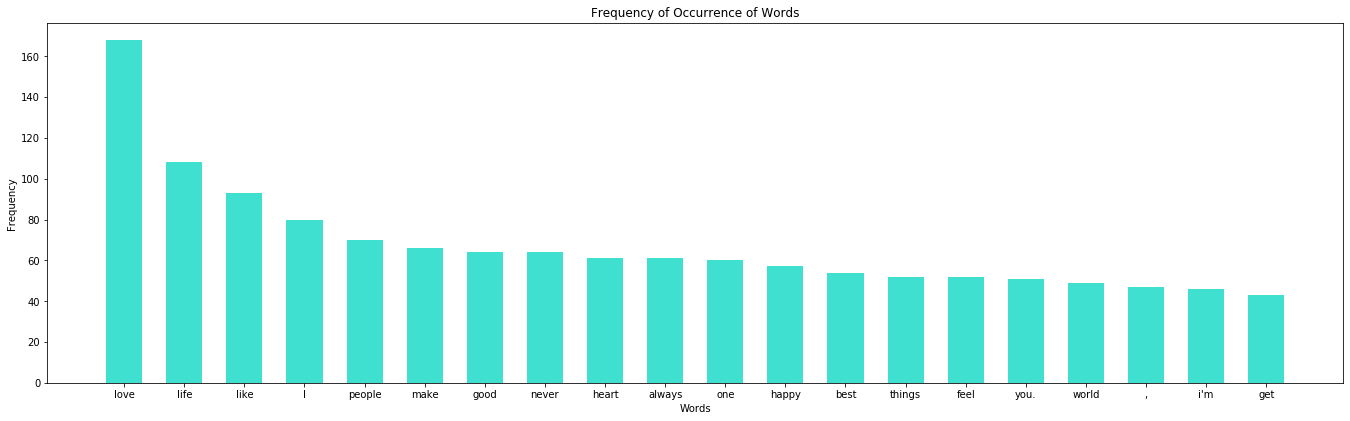

In [6]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(18,5))
ax = fig.add_axes([0,0,1,1])
width = 0.6
ax.bar(freq['words'][:20],freq['frequency_of_occurrence'][:20],width = width,color = 'turquoise')
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Occurrence of Words')
plt.show()

##### Removing punctuations and apostrophe from the posts

In [7]:
insta_posts = insta_posts.replace({'CLEAN_POSTS':{'can\'t':'can not','don\'t':'do not',' u ':' you ','i\'ll':'i will','i\'m':'i am','i\'ve':'i have',' ur ':' your ','i\'d':'i would','[^\w\s]':''}},regex = True)
insta_posts['CLEAN_POSTS'] = insta_posts['CLEAN_POSTS'].str.lower()
insta_posts['CLEAN_POSTS'] = insta_posts['CLEAN_POSTS'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#### correction of spellings in the post

In [8]:
insta_posts['CLEAN_POSTS'] = insta_posts['CLEAN_POSTS'].apply(lambda x: str(TextBlob(x).correct()))
insta_posts

,AGE,POSTS,NAME,word_count,char_count,avg_word_len,total_stopwords,stopwords,CLEAN_POSTS
0,20,"to hate is to show you stil care, who neds tha...",Garvit Kulshrestha,16,83,4.250000,6,"[to, is, to, you, who, on]",hate show still care news focus what really im...
1,20,so happy to see u back to life,Garvit Kulshrestha,8,30,2.875000,3,"[so, to, to]",happy see back life
2,20,"bad me , sad me is typical me",Garvit Kulshrestha,8,29,2.750000,4,"[me, me, is, me]",bad sad typical
3,20,look at her. don't look away. soothe her cold ...,Garvit Kulshrestha,13,69,4.384615,5,"[at, don't, her, with, your]",look look away soothe cold hands warmth
4,20,show attitude to those who do not desrve your ...,Garvit Kulshrestha,10,51,4.200000,6,"[to, those, who, do, not, your]",show attitude deserve love
...,...,...,...,...,...,...,...,...,...
1495,21,"Hope is like the sun, which , as we journey to...",Anshika,20,96,3.850000,8,"[is, the, which, as, we, the, of, our]",hope like sun journey toward casts shadow burd...
1496,21,"Great eagerness in the pursuit of wealth, plea...",Anshika,14,87,5.285714,4,"[in, the, of, or]",great eagerness pursuit wealth pleasure honor ...
1497,21,No man is free who cannot control himself.#men...,Anshika,8,55,6.000000,2,"[is, who]",man free cannot control himselfmeninreality
1498,21,A sense of concern for others gives our lives ...,Anshika,10,54,4.500000,3,"[of, for, our]",sense concern others gives lives meaning


##### Applying Lematization

In [ ]:
insta_posts['CLEAN_POSTS'] = insta_posts['CLEAN_POSTS'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## Data Visualization

 ## Applying Big 5 Categorizer 

##### Counting the occurence of each personality trait for every post

In [9]:
ocean = ['openness','conscientious','extraversion','agreeableness','neuroticism']
ocean_df = pd.read_excel(cwd+'/data/ocean_data.xlsx',encoding = 'utf-8')
insta_posts['post_tokens'] = insta_posts.apply(lambda t: t['CLEAN_POSTS'].split(' '),axis = 1)
def count(tokens,o):
    c = 0
    for token in tokens:
        if token in list(ocean_df[o]):
            c += 1
    return c
for o in ocean:
    insta_posts[o+'_count'] = insta_posts.apply(lambda c : count(c['post_tokens'],o),axis =1)

##### Saving the cleaned data along with the count

In [10]:
cleaned_posts = insta_posts
cleaned_posts['NAME'] = cleaned_posts['NAME'].str.title()
cleaned_posts.to_csv(cwd+'/data/Posts_Cleaning.csv',index = False,encoding = 'utf-8')
cleaned_posts

,AGE,POSTS,NAME,word_count,char_count,avg_word_len,total_stopwords,stopwords,CLEAN_POSTS,post_tokens,openness_count,conscientious_count,extraversion_count,agreeableness_count,neuroticism_count
0,20,"to hate is to show you stil care, who neds tha...",Garvit Kulshrestha,16,83,4.250000,6,"[to, is, to, you, who, on]",hate show still care news focus what really im...,"[hate, show, still, care, news, focus, what, r...",2,1,1,2,1
1,20,so happy to see u back to life,Garvit Kulshrestha,8,30,2.875000,3,"[so, to, to]",happy see back life,"[happy, see, back, life]",0,0,1,1,0
2,20,"bad me , sad me is typical me",Garvit Kulshrestha,8,29,2.750000,4,"[me, me, is, me]",bad sad typical,"[bad, sad, typical]",0,0,1,0,2
3,20,look at her. don't look away. soothe her cold ...,Garvit Kulshrestha,13,69,4.384615,5,"[at, don't, her, with, your]",look look away soothe cold hands warmth,"[look, look, away, soothe, cold, hands, warmth]",1,0,2,1,1
4,20,show attitude to those who do not desrve your ...,Garvit Kulshrestha,10,51,4.200000,6,"[to, those, who, do, not, your]",show attitude deserve love,"[show, attitude, deserve, love]",1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21,"Hope is like the sun, which , as we journey to...",Anshika,20,96,3.850000,8,"[is, the, which, as, we, the, of, our]",hope like sun journey toward casts shadow burd...,"[hope, like, sun, journey, toward, casts, shad...",1,2,0,1,2
1496,21,"Great eagerness in the pursuit of wealth, plea...",Anshika,14,87,5.285714,4,"[in, the, of, or]",great eagerness pursuit wealth pleasure honor ...,"[great, eagerness, pursuit, wealth, pleasure, ...",0,1,2,3,1
1497,21,No man is free who cannot control himself.#men...,Anshika,8,55,6.000000,2,"[is, who]",man free cannot control himselfmeninreality,"[man, free, cannot, control, himselfmeninreality]",1,1,0,0,1
1498,21,A sense of concern for others gives our lives ...,Anshika,10,54,4.500000,3,"[of, for, our]",sense concern others gives lives meaning,"[sense, concern, others, gives, lives, meaning]",0,1,0,2,0


## Analysing data from survey

##### Grouping the instagram posts data by name

In [11]:
insta_posts['NAME'] = insta_posts['NAME'].str.lower().str.strip()
grouped = insta_posts.groupby('NAME')
survey_names = pd.read_csv(cwd+'/data/survey_names.csv',encoding = 'utf-8')
survey_names['Name'] = survey_names['Name'].str.lower().str.strip()
names_17_survey = pd.DataFrame()
for name in list(survey_names['Name']):
    df = grouped.get_group(name)
    new_df = pd.DataFrame({'Name': name,'Age':df['AGE'].iloc[0],'total_posts': df.shape[0],'o_score':df['openness_count'].sum(),
                           'c_score':df['conscientious_count'].sum(),'e_score':df['extraversion_count'].sum(),
                           'a_score':df['agreeableness_count'].sum(),'n_score':df['neuroticism_count'].sum()},index = [0])
    names_17_survey = pd.concat([names_17_survey,new_df],sort = False)

def calculate_probability(os_,cs_,es_,as_,ns_,w):
    if w is 'o':
        sc = os_
    elif w is 'c':
        sc = cs_
    elif w is 'e':
        sc = es_
    elif w is 'a':
        sc = as_
    else:
        sc = ns_
    p = sc/(os_+cs_+es_+as_+ns_)
    return float(p)

for w in list('ocean'):
    names_17_survey[w+'_prob'] = names_17_survey.apply(lambda p : calculate_probability(p['o_score'],p['c_score'],p['e_score'],p['a_score'],p['n_score'],w),axis = 1)
names_17_survey    

,Name,Age,total_posts,o_score,c_score,e_score,a_score,n_score,o_prob,c_prob,e_prob,a_prob,n_prob
0,garvit kulshrestha,20,75,47,57,73,66,64,0.153094,0.185668,0.237785,0.214984,0.208469
0,naman jain,20,89,53,62,84,75,50,0.163580,0.191358,0.259259,0.231481,0.154321
0,dhruv khosla,21,82,41,41,46,50,65,0.168724,0.168724,0.189300,0.205761,0.267490
0,prabhav gupta,21,65,36,37,54,60,49,0.152542,0.156780,0.228814,0.254237,0.207627
0,adarsh abraham,24,90,69,58,76,77,51,0.208459,0.175227,0.229607,0.232628,0.154079
0,kunal vardey,24,67,48,49,49,71,46,0.182510,0.186312,0.186312,0.269962,0.174905
0,antriksh mangal,21,58,27,34,51,52,27,0.141361,0.178010,0.267016,0.272251,0.141361
0,archit sharma,21,101,62,64,74,86,59,0.179710,0.185507,0.214493,0.249275,0.171014
0,anika sharma,18,68,34,23,53,42,30,0.186813,0.126374,0.291209,0.230769,0.164835
0,sukriti arora,20,78,66,59,99,85,60,0.178862,0.159892,0.268293,0.230352,0.162602


##### Calculating the probability of each personality trait in posts as awell as survey data and analysing the difference% between both the data and then storing the analysis in a file

In [12]:
def analyse(diff,neg,pos):
    try: 
        d = diff.split('e')[1]
    except:
        d = 0
    if ((d is 0 or int(d)< -15) and neg < 0.1):
        return 'real'
    elif (int(d)>-15 and neg > -0.1 and pos < 0.2):
        return 'fake'
    else:
        return 'confused'

survey_mapped = names_17_survey.merge(survey_names,on = 'Name')
survey_mapped['diff(real-virtual) %'] = survey_mapped.apply(lambda d: str((d['O_probability']+d['C_probability']+d['E_probability']+d['A_probability']+d['N_probability'])-(d['o_prob']+d['c_prob']+d['e_prob']+d['a_prob']+d['n_prob'])),axis = 1 )
survey_mapped['real_negative'] = survey_mapped.apply(lambda d: (d['E_probability']+d['N_probability']),axis = 1 )
survey_mapped['virtual_negative'] = survey_mapped.apply(lambda d: (d['e_prob']+d['n_prob']),axis = 1 )
survey_mapped['real_positive'] = survey_mapped.apply(lambda d: (d['O_probability']+d['C_probability']+d['A_probability']),axis = 1 )
survey_mapped['virtual_positive'] = survey_mapped.apply(lambda d: (d['o_prob']+d['c_prob']+d['n_prob']),axis = 1 )
survey_mapped['diff+ve'] = survey_mapped.apply(lambda d: (d['real_positive']-d['virtual_positive']),axis = 1 )
survey_mapped['diff-ve'] = survey_mapped.apply(lambda d: (d['real_negative']-d['virtual_negative']),axis = 1 )
survey_mapped['analysis'] = survey_mapped.apply(lambda d: analyse(d['diff(real-virtual) %'],d['diff-ve'],d['diff+ve']),axis = 1 )

survey_mapped.to_csv(cwd+'/data/Final_anlysis.csv',index = False,encoding = 'utf-8')
survey_mapped

,Name,Age_x,total_posts,o_score,c_score,e_score,a_score,n_score,o_prob,c_prob,...,A_probability,N_probability,diff(real-virtual) %,real_negative,virtual_negative,real_positive,virtual_positive,diff+ve,diff-ve,analysis
0,garvit kulshrestha,20,75,47,57,73,66,64,0.153094,0.185668,...,0.269231,0.125000,0.0,0.278846,0.446254,0.721154,0.547231,0.173923,-0.167408,real
1,naman jain,20,89,53,62,84,75,50,0.163580,0.191358,...,0.194030,0.179104,1.000000082740371e-09,0.358209,0.413580,0.641791,0.509259,0.132532,-0.055371,fake
2,dhruv khosla,21,82,41,41,46,50,65,0.168724,0.168724,...,0.280488,0.085366,0.0,0.268293,0.456790,0.731707,0.604938,0.126769,-0.188497,real
3,prabhav gupta,21,65,36,37,54,60,49,0.152542,0.156780,...,0.336957,0.032609,1.000000082740371e-09,0.163043,0.436441,0.836957,0.516949,0.320007,-0.273397,confused
4,adarsh abraham,24,90,69,58,76,77,51,0.208459,0.175227,...,0.203252,0.227642,2.220446049250313e-16,0.390244,0.383686,0.609756,0.537764,0.071992,0.006558,real
5,kunal vardey,24,67,48,49,49,71,46,0.182510,0.186312,...,0.273684,0.147368,-1.1102230246251565e-16,0.284211,0.361217,0.715789,0.543726,0.172063,-0.077006,real
6,antriksh mangal,21,58,27,34,51,52,27,0.141361,0.178010,...,0.209790,0.209790,1.000000082740371e-09,0.391608,0.408377,0.608392,0.460733,0.147659,-0.016769,fake
7,archit sharma,21,101,62,64,74,86,59,0.179710,0.185507,...,0.261261,0.063063,-9.999999717180685e-10,0.225225,0.385507,0.774775,0.536232,0.238543,-0.160282,confused
8,anika sharma,18,68,34,23,53,42,30,0.186813,0.126374,...,0.181818,0.181818,-2.220446049250313e-16,0.282828,0.456044,0.717172,0.478022,0.239150,-0.173216,real
9,sukriti arora,20,78,66,59,99,85,60,0.178862,0.159892,...,0.217822,0.168317,0.0,0.376238,0.430894,0.623762,0.501355,0.122407,-0.054657,real


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7a72f52b0>,
      dtype=object)

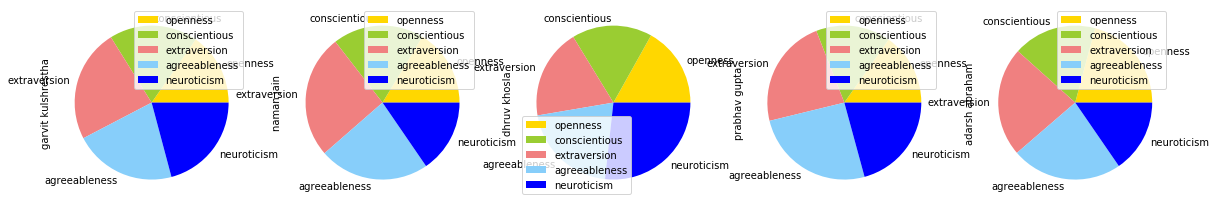

In [13]:
ocean = ['openness','conscientious','extraversion','agreeableness','neuroticism']
labels = ocean
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
df = survey_mapped[['Name','o_score','c_score','e_score','a_score','n_score']][:5]
df = df.set_index('Name')

df.T.plot.pie(subplots=True, figsize=(20, 20),labels = labels,colors = colors)

##### Collecting the output for every name in the above format in a text file

In [14]:
survey_mapped['Name'] = survey_mapped['Name'].str.upper()
all_analysis = '                                                     PERSONALITY TRAITS\n                                    '+\
'------------------------------------------------------'
c = 0
for name in list(survey_mapped['Name']):
    c += 1
    analysis = name+' is '+str(survey_mapped.loc[survey_mapped['Name'] == name]['Age_x'].iloc[0])+' years old and has '+str(survey_mapped.loc[survey_mapped['Name'] == name]['total_posts'].iloc[0])+\
               ' posts on instagram which reflect following personality traits in him: \n 1. Openness : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['o_prob'].iloc[0]*100) +\
               ' %\n 2. Conscientious : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['c_prob'].iloc[0]*100) +\
               ' %\n 3. Extraversion : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['e_prob'].iloc[0]*100) +\
               ' %\n 4. Agreeableness : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['a_prob'].iloc[0]*100) +\
               ' %\n 5. Neuroticism : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['n_prob'].iloc[0]*100) +\
               ' %\nWhile the survey shows following percentages of traits in his personality: '+\
               ' \n 1. Openness : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['O_probability'].iloc[0]*100) +\
               ' %\n 2. Conscientious : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['C_probability'].iloc[0]*100) +\
               ' %\n 3. Extraversion : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['E_probability'].iloc[0]*100) +\
               ' %\n 4. Agreeableness : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['A_probability'].iloc[0]*100) +\
               ' %\n 5. Neuroticism : '+str(survey_mapped.loc[survey_mapped['Name'] == name]['N_probability'].iloc[0]*100) +' %'
    if str(survey_mapped.loc[survey_mapped['Name'] == name]['analysis'].iloc[0]) is 'real':
        analysis += '\n\nThus,'+name+' is more likely to be the same person in real life as in the instagram posts.'
    elif str(survey_mapped.loc[survey_mapped['Name'] == name]['analysis'].iloc[0]) is 'fake':
        analysis += '\n\nThus,'+name+' is more likely to be pretentious in the instagram life than in the real life.'
    else:
        analysis += '\n\nThus,'+name+' at times may post reality but, sometimes might tend to be pretentious in the posts'
    all_analysis += '\n\n\n            ***************************************************************             \n                                '+str(c)+'. Analysis of '+name+\
    '\n            ***************************************************************             \n\n'+analysis    
with open(cwd+'/data/Personality Output.txt','w+') as file:
    file.write(all_analysis)

###### Different Measures of Personality traits depicted by People from Instagram Posts

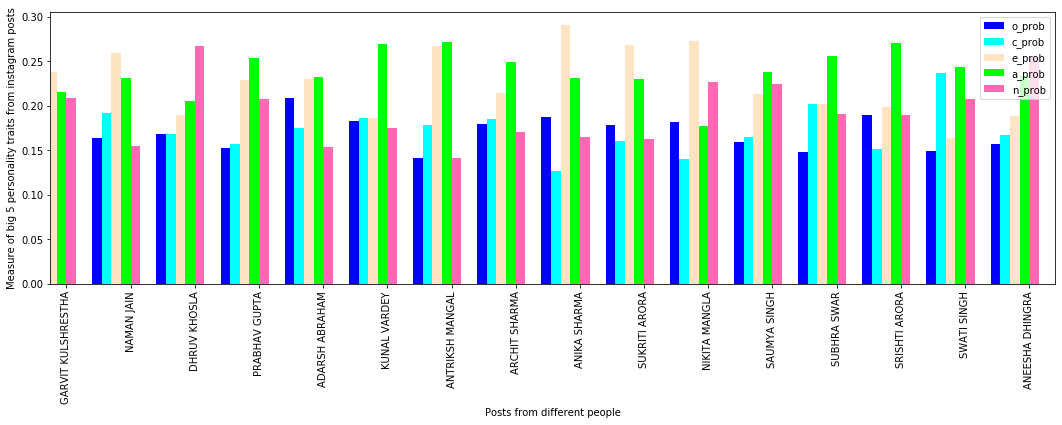

In [15]:
df = survey_mapped.set_index('Name')
fig, ax = plt.subplots(figsize=(18,5))
width = 0.15
df.o_prob.plot(kind='bar', color='blue', ax=ax, width=width, position=4)
df.c_prob.plot(kind='bar', color='cyan', ax=ax, width=width, position=3)
df.e_prob.plot(kind='bar', color='bisque', ax=ax, width=width, position=2)
df.a_prob.plot(kind='bar', color='lime', ax=ax, width=width, position=1)
df.n_prob.plot(kind='bar', color='hotpink', ax=ax, width=width, position=0)
ax.set_xlabel('Posts from different people')
ax.set_ylabel('Measure of big 5 personality traits from instagram posts')
ax.legend()
plt.show()

###### Different Measures of Personality traits depicted by People in real life survey

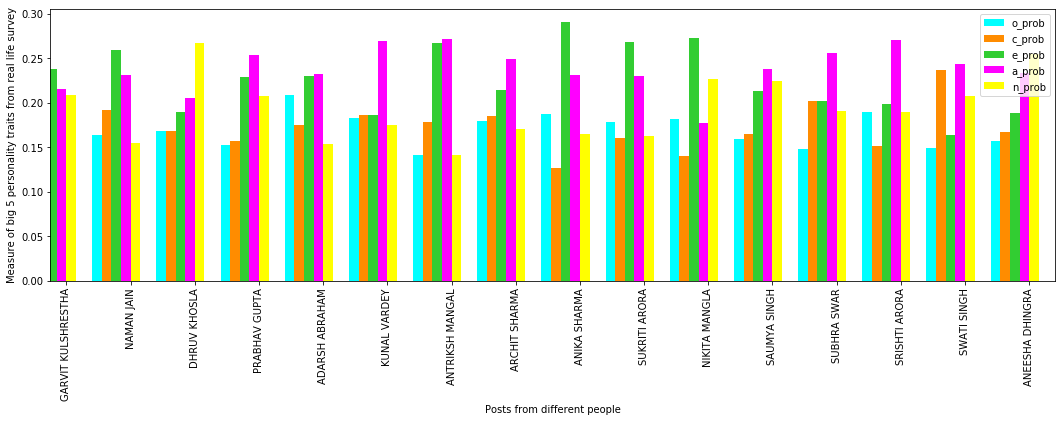

In [16]:
df = survey_mapped.set_index('Name')
fig, ax = plt.subplots(figsize=(18,5))
width = 0.15
df.o_prob.plot(kind='bar', color='aqua', ax=ax, width=width, position=4)
df.c_prob.plot(kind='bar', color='darkorange', ax=ax, width=width, position=3)
df.e_prob.plot(kind='bar', color='limegreen', ax=ax, width=width, position=2)
df.a_prob.plot(kind='bar', color='magenta', ax=ax, width=width, position=1)
df.n_prob.plot(kind='bar', color='yellow', ax=ax, width=width, position=0)
ax.set_xlabel('Posts from different people')
ax.set_ylabel('Measure of big 5 personality traits from real life survey')
ax.legend()
plt.show()

###### Comparison of Negative Personality Traits in the instagram posts and the real life

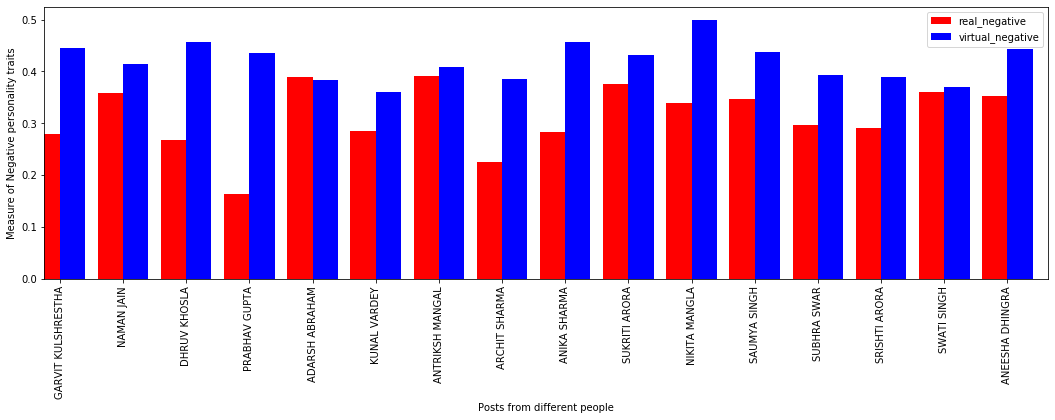

In [17]:
df = survey_mapped.set_index('Name')
fig, ax = plt.subplots(figsize=(18,5))
width = 0.4
df.real_negative.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.virtual_negative.plot(kind='bar', color='blue', ax=ax, width=width, position=0)
ax.set_xlabel('Posts from different people')
ax.set_ylabel('Measure of Negative personality traits')
ax.legend()
plt.show()

###### Comparison of Positive Personality Traits in the instagram posts and the real life

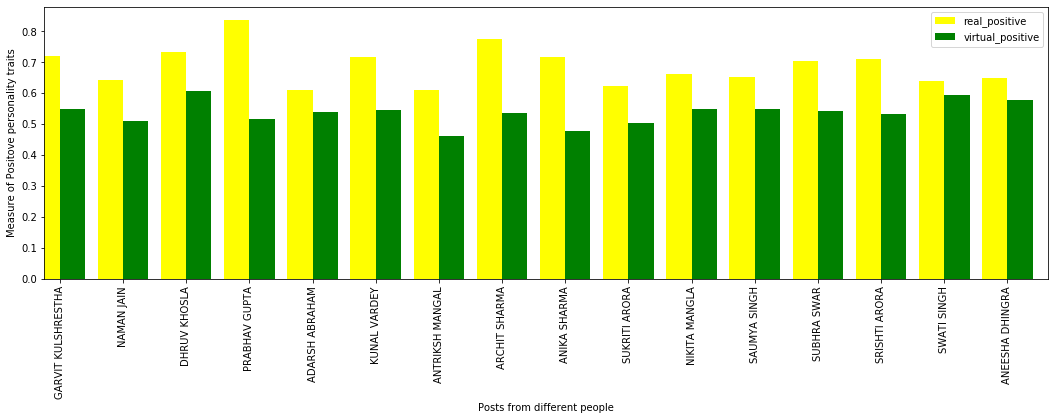

In [18]:
df = survey_mapped.set_index('Name')
fig, ax = plt.subplots(figsize=(18,5))
width = 0.4
df.real_positive.plot(kind='bar', color='yellow', ax=ax, width=width, position=1)
df.virtual_positive.plot(kind='bar', color='green', ax=ax, width=width, position=0)
ax.set_xlabel('Posts from different people')
ax.set_ylabel('Measure of Positove personality traits')
ax.legend()
plt.show()